# **High-Frequency Quasi-Periodic Oscillations in the Solar Corona Observed with High-Frame-Rate Imaging During the 2023 Total Solar Eclipse**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  
- `scipy==1.13.1`  


<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook figure - coronal overview **
#### The coronal overview. 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.io import fits
import skimage.io as io 
import struct
import imageio as iio
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
import cv2

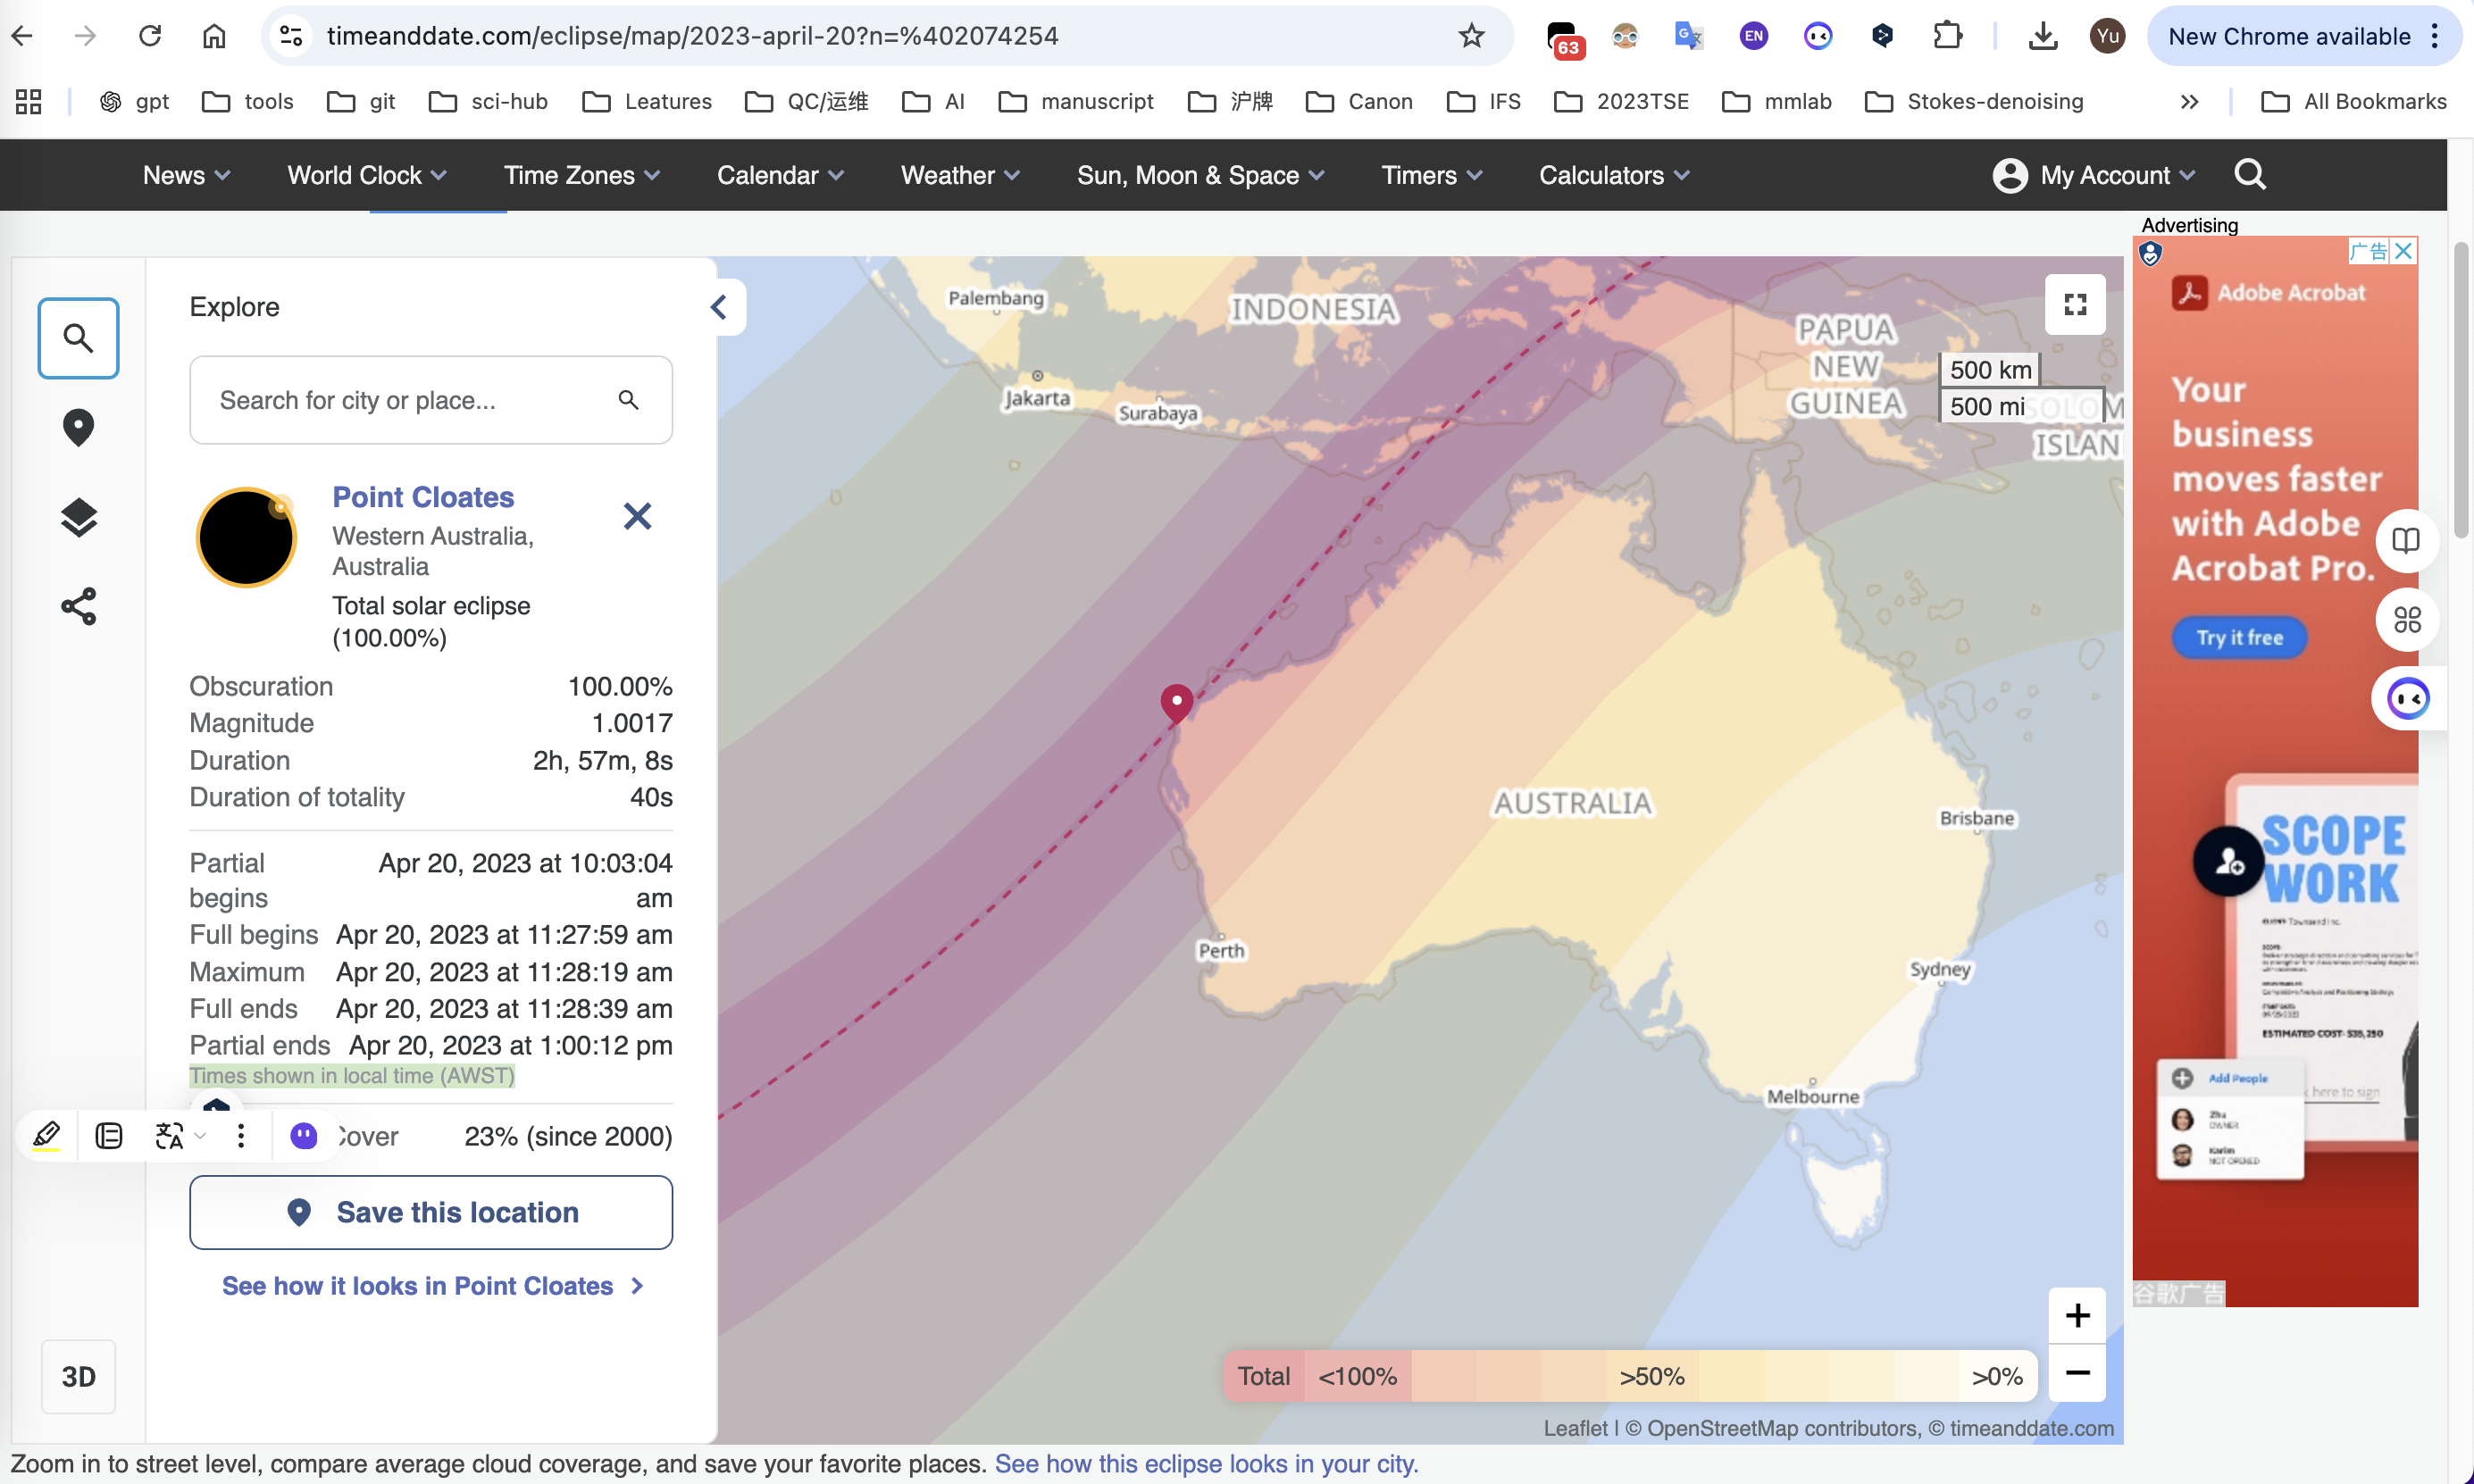
https://www.timeanddate.com/eclipse/map/2023-april-20?n=%402074254

---
#EAST 7057 $\AA$ DATA#
---

In [31]:
dirreg = './input/EAST/7057/'    # regisntration np data  
pathd = dirreg
listd = os.listdir(pathd)
listd.sort()
print(listd)

['00002122.fits']


In [32]:
pathd = dirreg
listd = os.listdir(pathd)
listd.sort()
print(listd)

['00002122.fits']


00002122.fits


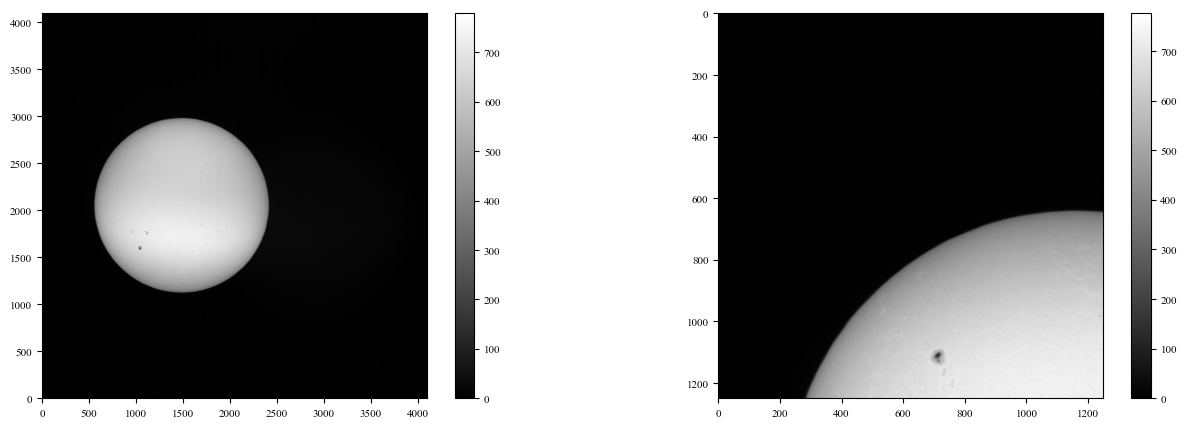

In [33]:
# 5.0 data dark processing
st1 = 0
hdu =fits.open(pathd  + listd[0 + st1 ])
print(listd[0 + st1])
img = hdu[0].data

sr,er,sc,ec = 480, 480 + 1250, 330, 330 +1250
plt.figure(figsize = [16,5])
plt.subplot(121)
plt.imshow(img,cmap = 'gray',origin = 'lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(img[sr:er, sc:ec],cmap = 'gray')
plt.colorbar()
plt.show()

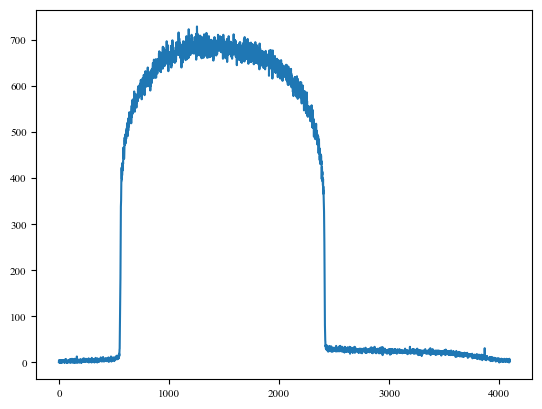

In [34]:
plt.plot(img[2000])

In [35]:
listd[0 + st1]

'00002122.fits'

Shape of the processed image array: (4096, 4096)


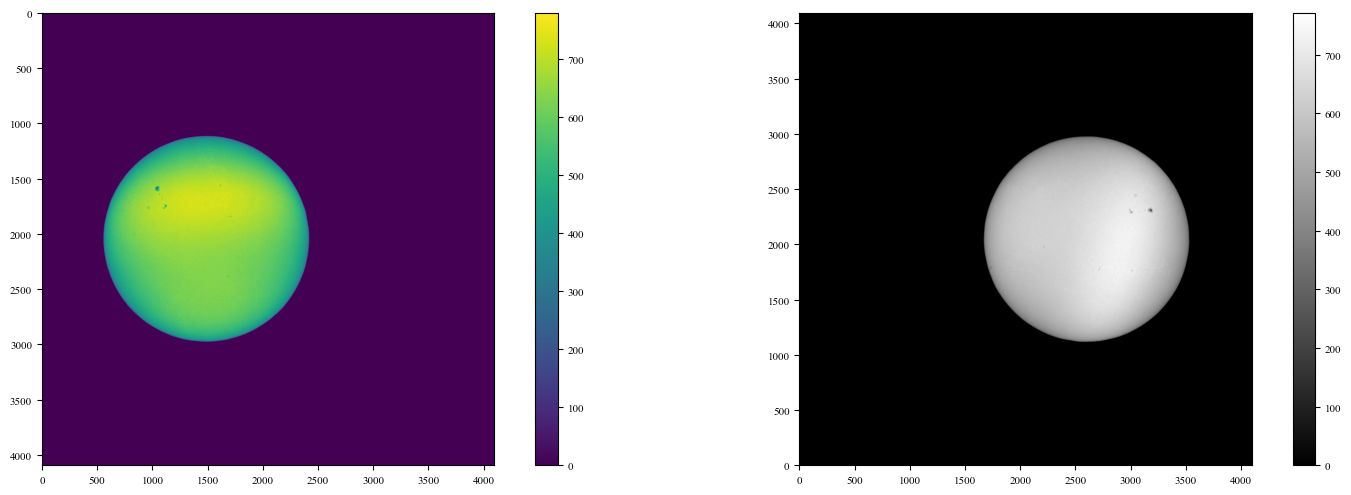

Center x, y: (1485, 2039)


In [36]:
import numpy as np
import cv2
from astropy.io import fits

def compute_centroid(image):
    """Calculate the centroid of the image"""
    # Calculate the weighted average of each pixel
    M = cv2.moments(image)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    return (cX, cY)

def process_fits_image(fits_path, rotation_angle=70):
    # Read the FITS image
    with fits.open(fits_path) as hdul:
        image = hdul[0].data
    
    # remove the background of the coronal data
    image[np.where(image < 100)] = 0
    
    # Ensure the image is of integer type
    # image = np.asarray(image, dtype=np.uint8)
    
    # Calculate the centroid
    center = compute_centroid(image)
    
    # Image dimensions
    (h, w) = image.shape
    
    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    
    # Rotate the image
    rotated_image = cv2.warpAffine(image, M, (w, h))
    
    # Flip the image horizontally
    flipped_image = cv2.flip(rotated_image, 1)
    
    return flipped_image, image, center

# Example usage
input_fits_path = pathd  + listd[0 + st1 ]
processed_image_array, img0, center = process_fits_image(input_fits_path)
img705 = processed_image_array.copy()
# Print the shape of the array
print("Shape of the processed image array:", processed_image_array.shape)

# # If you need to save the processed image as a NumPy file
# np.save('processed_sun_image.npy', processed_image_array)
# print("Processed image array has been saved as: processed_sun_image.npy")

# # If you want to see a part of the processed image array, you can print part of the array
# print("Processed image array (first 100x100 part):")
# print(processed_image_array[:100, :100])

plt.figure(figsize=[16, 5])
plt.subplot(121)
plt.imshow(img0)
plt.colorbar()
plt.subplot(122)
plt.imshow(img705, cmap='gray', origin='lower')
plt.colorbar()
plt.tight_layout()
plt.show()

print('Center x, y:', center)


(2039, 2611)

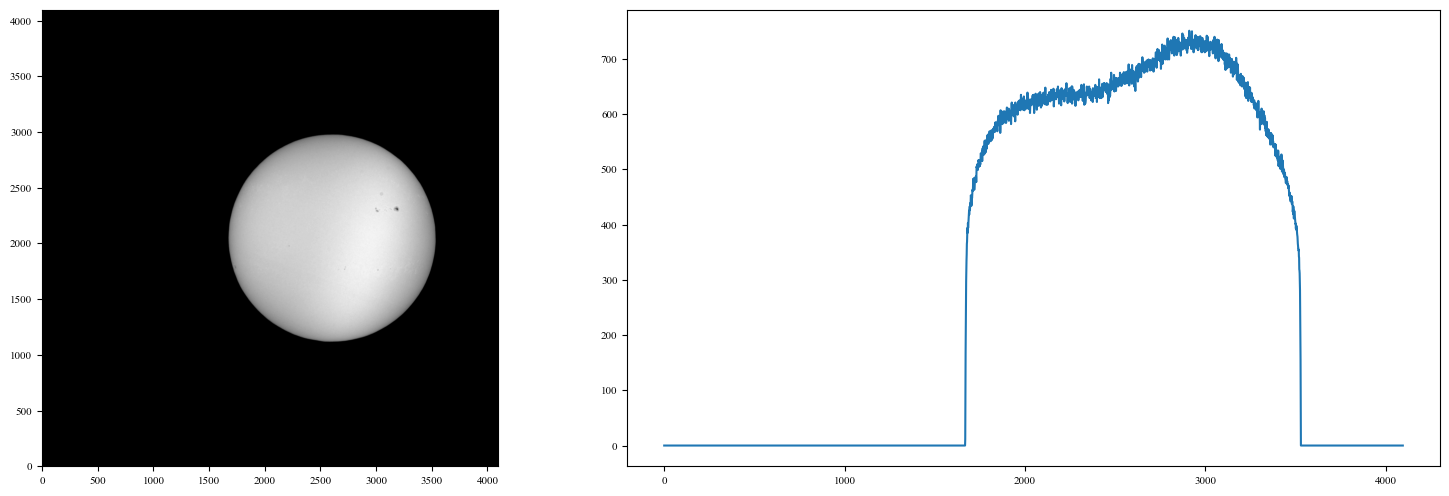

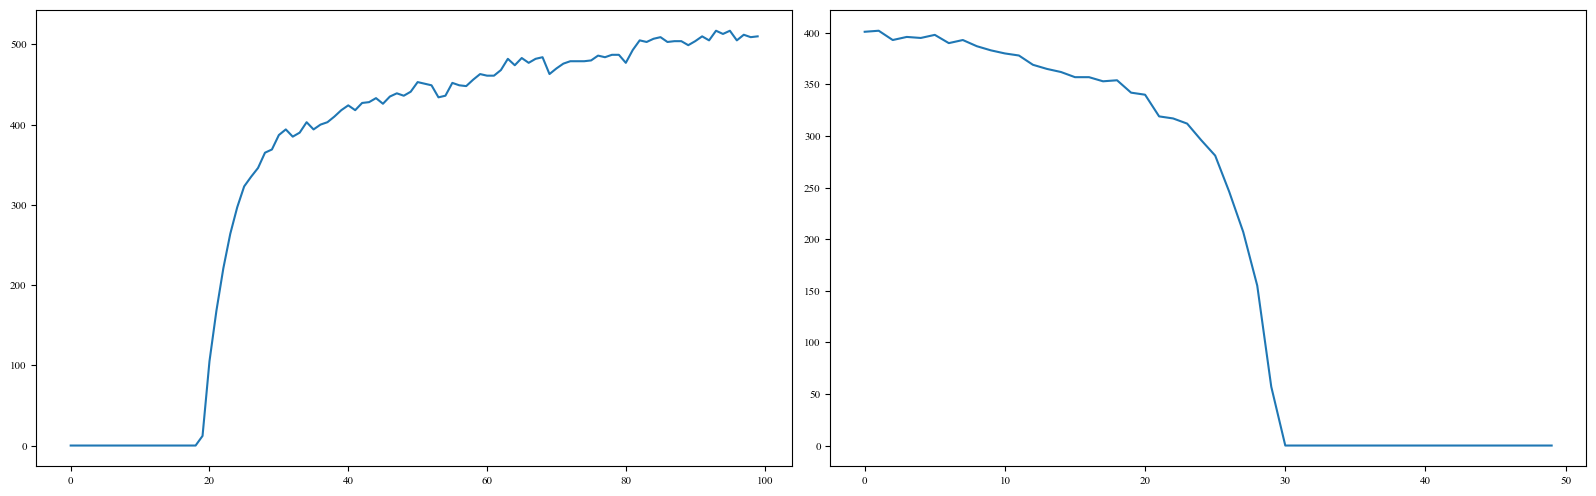

In [37]:
rcx, rcy = 4096 - center[0], center[1]
rcr, rcc = rcy, rcx


plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(img705,cmap='gray', origin='lower')
plt.subplot(122)
plt.plot(img705[rcy,:])
plt.tight_layout()


plt.figure(figsize=[16,5])
plt.subplot(121)
plt.plot(img705[rcy,1650:1750])
plt.subplot(122)
plt.plot(img705[rcy,3500:3550])
plt.tight_layout()

rcr, rcc

In [38]:
sdos, sdoe = 1650 + 20, 3500 + 30
sdod = sdoe - sdos
sdos, sdoe, sdod

(1670, 3530, 1860)

---
#SDO composite DATA#
---

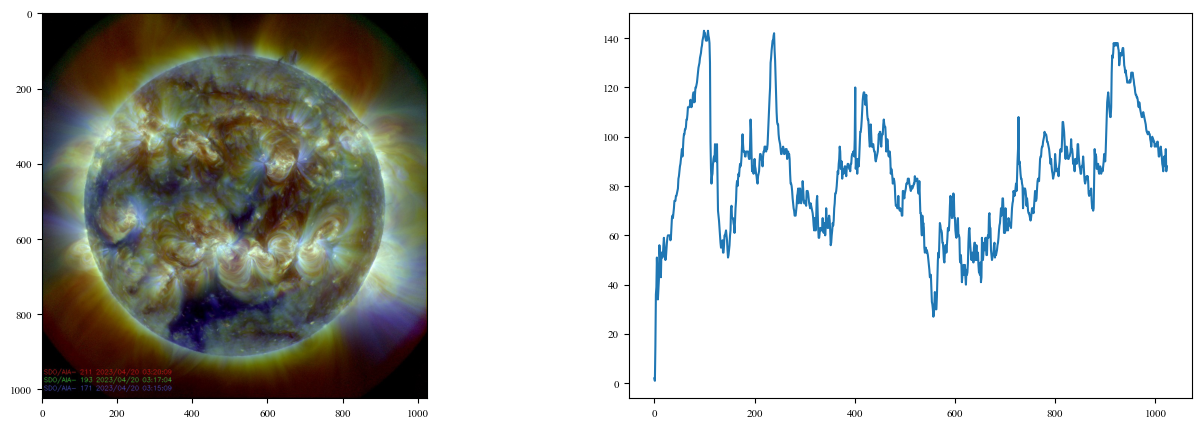

107 917 810


<Figure size 640x480 with 0 Axes>

In [39]:
from PIL import Image
import matplotlib.pyplot as plt

# 打开图片
img = Image.open('./input/sdo/20230420_031509_1024_211193171.jpg')
imgsdo = np.array(img)
# 显示图片
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(imgsdo)
plt.subplot(122)
plt.plot(imgsdo[512,:,0])
plt.show()
plt.tight_layout()

sdosr = imgsdo[512,:,0] 
smax, emax = np.argmax(sdosr[100:200]),  np.argmax(sdosr[800:1000])
smax += 100
emax += 800
rd = emax - smax
print(smax, emax, rd)

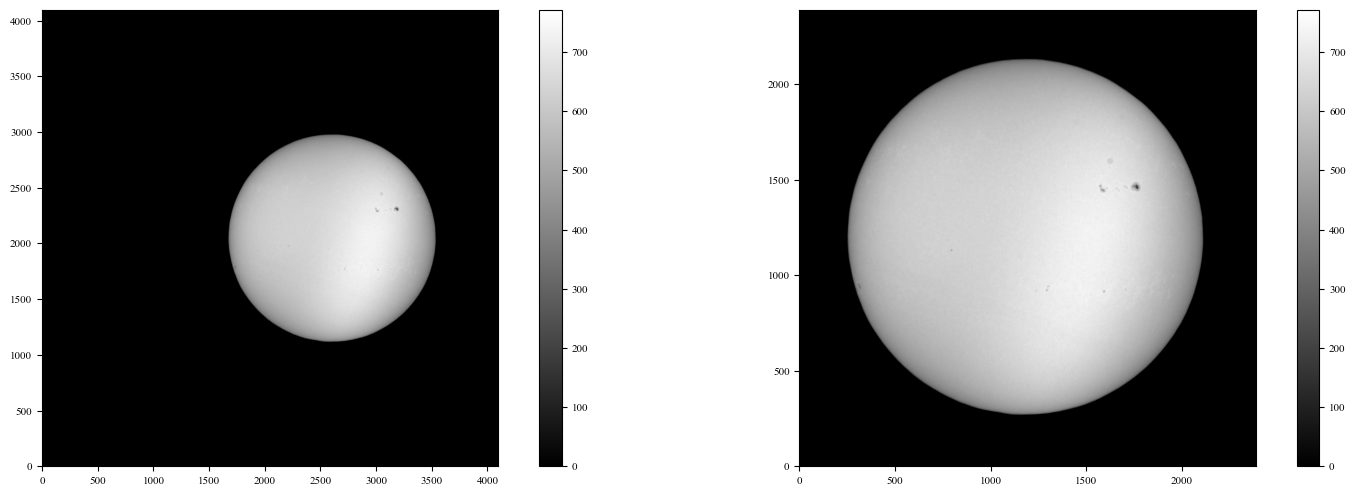

In [40]:
d1 = int(sdod / 797 * 1024)
r1 = int(d1/2)
d1,r1

img705c = img705[rcr - r1: rcr+r1, rcc-r1:rcc+r1 ]

plt.figure(figsize = [16,5])
plt.subplot(121)
plt.imshow(img705,cmap='gray', origin='lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(img705c,cmap='gray', origin='lower')
plt.colorbar()
plt.tight_layout()
plt.show()


---
#Learmouth-GONG DATA#
---

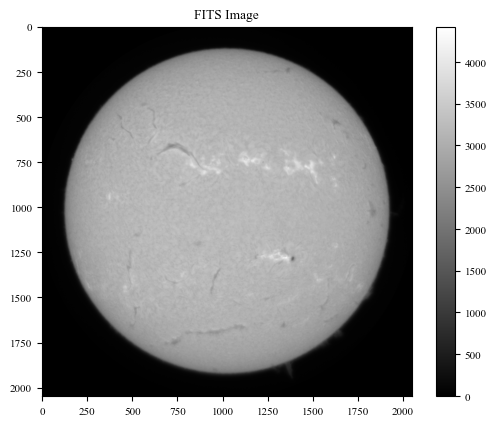

In [41]:
gong_path = './input/Learmouth-GONG/20230420015942Lh.fits.fz'


import fitsio
import matplotlib.pyplot as plt

# 读取 .fits.fz 文件
fits_file = gong_path
data = fitsio.read(fits_file)

# 显示数据
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.title('FITS Image')
plt.show()



---
#iPhone white-light DATA#
---

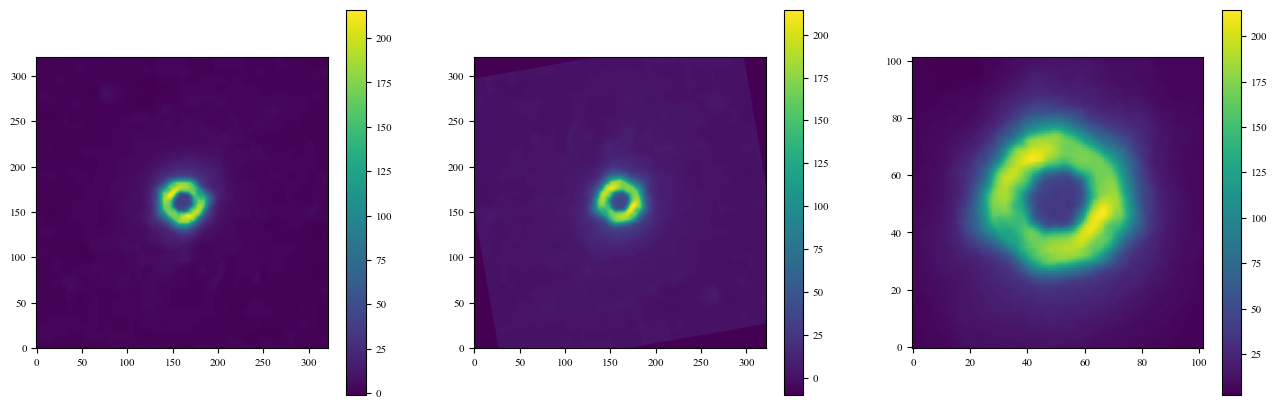

In [42]:
path0 = '/Volumes/WD1T/share/TSE2023/'    # input dir
pathfd  = path0 + 'iPhone/result/dfdatat/'  # results
list0 = os.listdir(pathfd)
list0.sort()
hdu = fits.open(pathfd + list0[4800])
img0 = hdu[0].data 

m,n = img0.shape
cr, cc = int(m/2), int(n/2)

def rotimg(img2, cr, cc, degree):
    img2 = img2 + 10
    sxy = 1  # Scaling factor
    rxy = degree  # Rotation angle required for visual alignment
    m, n = img2.shape
    matrix = cv2.getRotationMatrix2D((cr, cc), rxy, sxy)
    rimg2 = cv2.warpAffine(img2, matrix, (m, n))
    rimg2 = rimg2.astype('float32')
    rimg2 -= 10
    return rimg2
import math
m,n = img0.shape
sr,er,sc,ec = int(m/2) - 17*3, int(m/2) + 17*3, int(n/2) - 17*3, int(n/2) + 17*3
rimg = rotimg(img0, cr, cc, 170)
crimg = rimg[sr:er,sc:ec]

plt.figure(figsize = [16,5])
plt.subplot(131)
plt.imshow(img0, origin='lower')
plt.colorbar()
plt.subplot(132)
plt.imshow(rimg, origin='lower')
plt.colorbar()
plt.subplot(133)
plt.imshow(crimg, origin='lower')
plt.colorbar()
plt.show()

---
#Plot figure#
---

In [43]:
c2= 120
img705c1 = img705c[c2:-c2,c2:-c2]
data.shape, img705c.shape

((2048, 2048), (2388, 2388))

In [44]:
# plt.figure(figsize = [8,8], dpi=300)

# plt.subplot(221)
# plt.imshow(imgsdo)
# # plt.colorbar()
# plt.axis('off')
# plt.title('SDO Composite (211, 193, 171 ${\AA}$)')

# plt.subplot(222)
# plt.imshow(crimg,cmap='gray', origin='lower')
# # plt.colorbar()
# plt.axis('off')
# plt.title('iPhone white light (10nm@565nm)')

# plt.subplot(223)
# plt.imshow(data,cmap='gray', origin='lower')
# # plt.colorbar()
# plt.axis('off')
# plt.title('H-alpha $6563{\AA}$')

# plt.subplot(224)
# plt.imshow(img705c1,cmap='gray', origin='lower')
# # plt.colorbar()
# plt.axis('off')
# plt.title('TiO $7057{\AA}$')

# plt.tight_layout()
# savepath = './output/'
# plt.savefig(savepath + 'sdo_east.png', bbox_inches='tight')
# plt.show()

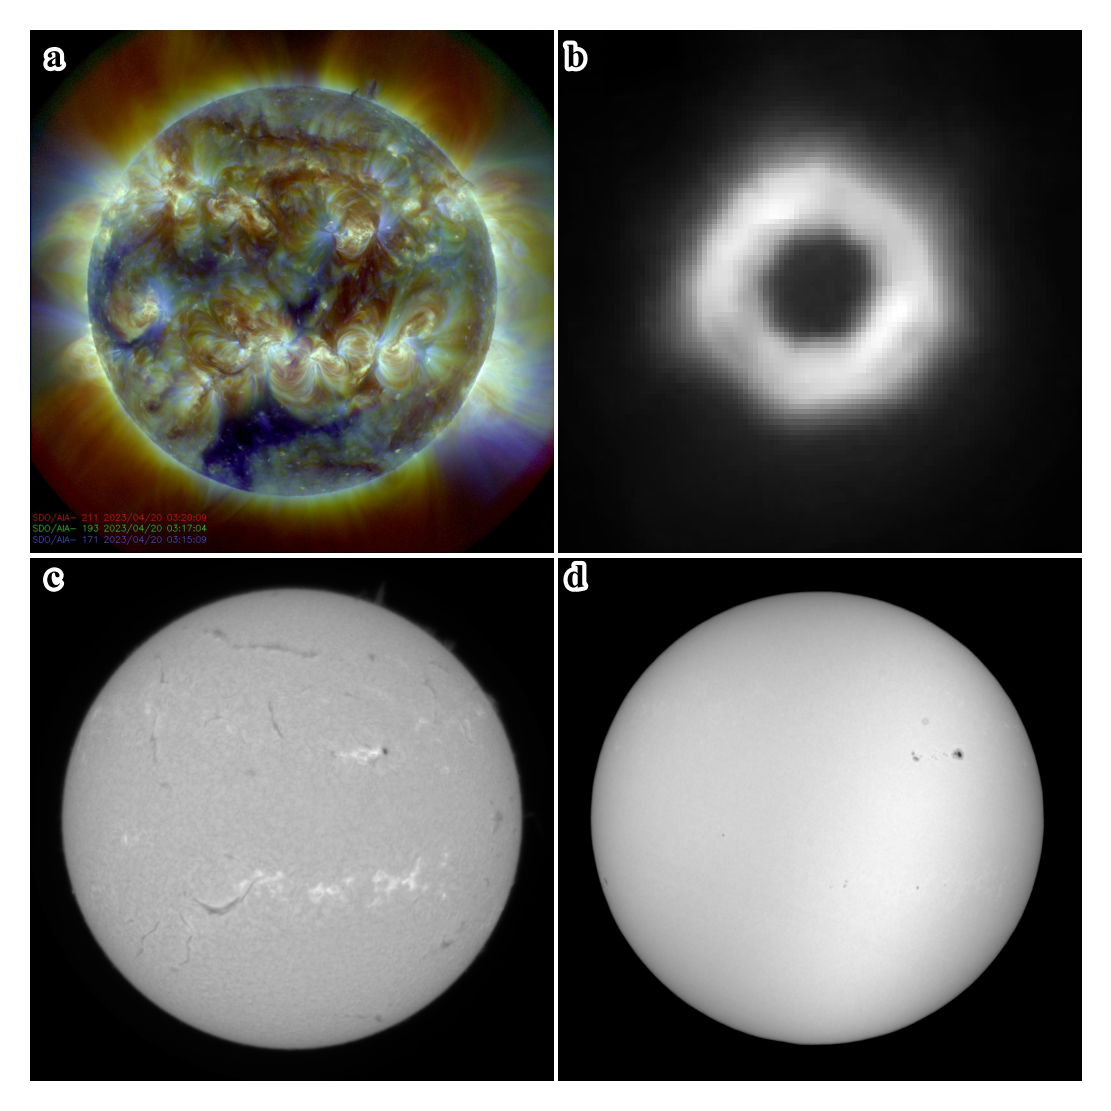

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Set global font to Times New Roman, font size to 8
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 8

plt.figure(figsize=[3.54, 3.54], dpi=300) 

# Subplot 1
plt.subplot(221)
plt.imshow(imgsdo)
plt.axis('off')

# Subplot 2
plt.subplot(222)
plt.imshow(crimg, cmap='gray', origin='lower')
plt.axis('off')

# Subplot 3
plt.subplot(223)
plt.imshow(data, cmap='gray', origin='lower')
plt.axis('off')

# Subplot 4
plt.subplot(224)
plt.imshow(img705c1, cmap='gray', origin='lower')
plt.axis('off')

# Add subplot labels (a, b, c, d)
# a: Overall top-left
ss = 8  # ss: Subplot label font size
plt.gcf().text(0.02, 0.96, 'a', fontsize=ss, fontweight='bold', color='black',
               path_effects=[path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# b: Overall top-right
plt.gcf().text(0.51, 0.96, 'b', fontsize=ss, fontweight='bold', color='black',
               path_effects=[path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# c: Overall bottom-left
plt.gcf().text(0.02, 0.47, 'c', fontsize=ss, fontweight='bold', color='black',
               path_effects=[path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# d: Overall bottom-right
plt.gcf().text(0.51, 0.47, 'd', fontsize=ss, fontweight='bold', color='black',
               path_effects=[path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Adjust subplot spacing to minimize gaps
plt.subplots_adjust(left=0.005, right=0.995, top=0.995, bottom=0.005, wspace=0.01, hspace=0.01)

# Save the image
savepath = './output/'
plt.savefig(savepath + 'sdo_east.png', bbox_inches='tight')
plt.show()
